# Bellingham Stormwater Monitoring Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To activate the virtual environment and resolve the modules
1. Create virtual env (done)
2. Open terminal tab
3. source venv/bin/activate
4. Verify that (venv) prefix in terminal window
5. pip install jupyter
6. pip install <modules>
7. pip list | grep <module> to check they are installed
8. Add the virtual env as a juptyer kernel 'python -m ipykernel install --user --name=venv --display-name "Python (venv)"'
9. Restart VS Code and Select the correct Jupyter kernel
10. Click the kernel selector (top right)
11. Select an other kernel and select Python Environments
12. Select 'venv (Python 3.13.2)' kernel

In [2]:
from IPython.display import display, HTML

# Define the CSS to set the height of the output container
css_style = """
<style>
    div.output_area {
        height: 800px; /* Adjust this value based on your needs */
        overflow-y: auto; /* Vertical scroll */
        overflow-x: auto; /* Horizontal scroll */
    }
</style>
"""
# Apply the CSS style to the notebook
display(HTML(css_style))

pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_columns', 1000) 

## TODO
1. Review the other site data as well as Bellingham
2. Determine treatment of duplicates (DONE)
3. Add F chart to show variability.  Review F-Chart calcs from stats book.  Not std
4. Try altair plots (DONE)
5. Research how e.coli data is collected
6. What is variability with time and incubation?
7. Verify that all these tests were taken with similar methods (R-Card, lab, ...).  Comments refer to counts on some measurements which allude to R-Card
8. Convert to plots using Tidy dataset frame and not stack (plotly, or Altair) (DONE)
9. Add column called is_exceedence and calculate counts (see below)
10. Look into stormwater bacteria level modelling
11. Investigate log-normal distribution for defects



![Bacteria](e.coli-sampling-protocol.png) 

In [3]:
#Original dataset provided by Kirsten McDade on May 28th 2024
dataset1 = 'Salish Sea Stormwater Monitoring Database-20240528.csv'

#Updated dataset provided by Kirsten McDade on Oct 8th 2024
dataset2 = 'Bellingham SW Data_ALL_20241008.csv'

data = pd.read_csv(dataset2)

## Clean raw data

### Clean Dataset1 specific

# Remove 'Unnamed' columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')].dropna(how='all')

# Remove rows with Nan in 'Sample Date' column
data = data.dropna(subset=['Sample Date'])
data = data.rename(columns={'E. Coli': 'E-Coli'}) #This column name causes data plotting weirdness

data.head()

## Clean Dataset2 Specific

In [4]:
data = data.rename(columns={'Survey::Survey_Date': 'Sample Date'})
data = data.rename(columns={'Survey::City': 'City'})
data = data.rename(columns={'Outfall_ID': 'Site ID'})
data = data.rename(columns={'E. coli at 100ml': 'E-Coli'})
data = data.rename(columns={'Enterococcus at 100ml': 'Enterococcus'})

# Convert Sample Date to datetime
data['Sample Date'] = pd.to_datetime(data['Sample Date'])
#data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce', format='%m-%d-%y')

#Remove rows with NaN E-Coli values
data = data.dropna(subset=['E-Coli'])

data.dtypes
data.describe()

#data

,Sample Date,E-Coli,Air Temp,Alkalinity,Color,Cond Exceed Tot,Conductivity,Copper,Copper Exceed Tot,DO,DO Exceedance Tot,E. coli Exceed Tot,Enterococcus,Flouride,Hardness,Hydrogen Sulfide,Iron,Lead,Lead Exceed Tot,Manganese,Mercury,Nitrate,Nitrite,Odor,pH,pH Exceed Tot,Salinity,Sample Vol ML,Sodium Chloride,Temp Exceed Tot,Temp_Difference,Total Chlorine,TotalCount,Turbidity,Turbidity Exceed Tot,UniqueCount,Visual,Water Temp,Zinc
count,458,458.000000,455.000000,77.000000,455.000000,458.0,449.000000,77.000000,458.0,407.000000,458.0,458.0,75.000000,77.000000,76.000000,77.0,77.000000,77.000000,458.0,77.000000,77.000000,74.000000,74.000000,455.000000,451.000000,458.0,451.000000,53.000000,74.000000,458.0,455.000000,70.000000,458.0,441.000000,458.0,458.000000,455.000000,455.000000,77.000000
mean,2023-01-02 14:34:03.668122368,525.532751,14.279692,40.129870,0.465934,164.0,2228.044410,0.016234,8.0,11.315111,30.0,126.0,556.546667,0.051948,90.868421,0.0,0.003896,0.750000,0.0,0.000649,0.000078,0.945946,0.013514,0.173626,7.502838,0.0,1.309202,4.283019,31.756757,175.0,-1.330462,0.135714,565.0,11.305646,6.0,7.650097,0.312088,12.949231,0.454545
min,2021-02-03 00:00:00,0.000000,1.100000,0.000000,0.000000,164.0,0.000000,0.000000,8.0,3.810000,30.0,126.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.0,0.000000,3.000000,0.000000,175.0,-16.700000,0.000000,565.0,0.000000,6.0,0.018519,0.000000,2.700000,0.000000
25%,2022-02-24 00:00:00,40.000000,8.890000,0.000000,0.000000,164.0,224.900000,0.000000,8.0,9.165000,30.0,126.0,27.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.180000,0.0,0.110000,3.000000,0.000000,175.0,-4.450000,0.000000,565.0,6.060000,6.0,2.321429,0.000000,9.250000,0.000000
50%,2023-01-03 00:00:00,127.500000,14.000000,40.000000,0.000000,164.0,323.900000,0.000000,8.0,10.330000,30.0,126.0,125.000000,0.000000,50.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.490000,0.0,0.160000,3.000000,0.000000,175.0,-1.900000,0.000000,565.0,9.000000,6.0,5.552632,0.000000,12.700000,0.000000
75%,2024-01-05 00:00:00,375.000000,20.600000,80.000000,1.000000,164.0,958.000000,0.000000,8.0,11.800000,30.0,126.0,380.000000,0.000000,100.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.825000,0.0,0.560000,3.000000,0.000000,175.0,1.000000,0.500000,565.0,9.000000,6.0,12.922619,0.000000,16.400000,0.000000
max,2024-09-17 00:00:00,20480.000000,27.500000,180.000000,3.000000,164.0,42510.000000,0.250000,8.0,114.320000,30.0,126.0,9999.000000,4.000000,425.000000,0.0,0.300000,5.000000,0.0,0.050000,0.002000,60.000000,1.000000,3.000000,8.950000,0.0,27.300000,20.000000,2000.000000,175.0,95.000000,0.500000,565.0,605.000000,6.0,17.000000,3.000000,116.000000,10.000000
std,NaN,1645.472312,6.567947,40.278423,0.672332,0.0,4968.152077,0.056453,0.0,10.565475,0.0,0.0,1348.743512,0.455842,108.474186,0.0,0.034188,1.722529,0.0,0.005698,0.000390,7.055343,0.116248,0.508265,0.498621,0.0,3.006830,4.533539,232.846343,0.0,6.179555,0.223954,0.0,42.039233,0.0,5.482956,0.596767,6.431297,1.846372


In [5]:
#show unique site ids
site_ids = data['Site ID'].unique()
site_ids

array(['Bennett Ave', 'Broadway St', 'C St', 'Cedar', 'Cedar St',
       'Cornwall St', 'G05-1002', 'G06-1001', 'G11-1001',
       'Little Squalicum Creek', 'Olive St', 'Padden Creek',
       'Squalicum Creek', 'Whatcom Creek', 'Willow St'], dtype=object)

In [6]:
# Rename Site Id 'Cedar' to 'Cedar St'
data['Site ID'] = data['Site ID'].replace('Cedar', 'Cedar St')

In [7]:
# Identify duplicates
duplicates = data[data.duplicated(keep=False)]

data['is_duplicate'] = data.duplicated(subset=['Site ID', 'Sample Date'], keep=False)

# Remove rows with Nan in 'Sample Date' column
#data = data.dropna(subset=['Sample Date'])

data[data['is_duplicate'] == True].describe()
#data[data['is_duplicate'] == True]
#data

,Sample Date,E-Coli,Air Temp,Alkalinity,Color,Cond Exceed Tot,Conductivity,Copper,Copper Exceed Tot,DO,DO Exceedance Tot,E. coli Exceed Tot,Enterococcus,Flouride,Hardness,Hydrogen Sulfide,Iron,Lead,Lead Exceed Tot,Manganese,Mercury,Nitrate,Nitrite,Odor,pH,pH Exceed Tot,Salinity,Sample Vol ML,Sodium Chloride,Temp Exceed Tot,Temp_Difference,Total Chlorine,TotalCount,Turbidity,Turbidity Exceed Tot,UniqueCount,Visual,Water Temp,Zinc
count,112,112.000000,112.000000,26.000000,112.000000,112.0,111.000000,26.000000,112.0,104.000000,112.0,112.0,22.000000,26.0,26.000000,26.0,26.0,26.000000,112.0,26.0,26.000000,24.000000,24.000000,112.000000,112.000000,112.0,112.000000,22.000000,25.0,112.0,112.000000,23.000000,112.0,104.000000,112.0,112.000000,112.000000,112.000000,26.000000
mean,2023-03-27 08:08:34.285714176,411.830357,14.493929,28.461538,0.580357,164.0,3183.974234,0.032692,8.0,10.730865,30.0,126.0,352.500000,0.0,89.423077,0.0,0.0,1.153846,0.0,0.0,0.000077,0.416667,0.041667,0.232143,7.474464,0.0,1.864375,4.545455,2.0,175.0,-0.602857,0.152174,565.0,20.720481,6.0,6.950478,0.419643,13.891071,0.769231
min,2021-02-03 00:00:00,0.000000,1.100000,0.000000,0.000000,164.0,0.400000,0.000000,8.0,4.880000,30.0,126.0,10.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.890000,0.0,0.000000,3.000000,0.0,175.0,-10.800000,0.000000,565.0,0.000000,6.0,0.222222,0.000000,4.900000,0.000000
25%,2022-04-11 18:00:00,40.000000,8.890000,0.000000,0.000000,164.0,235.050000,0.000000,8.0,8.997500,30.0,126.0,56.250000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.147500,0.0,0.107500,3.000000,0.0,175.0,-4.075000,0.000000,565.0,5.462500,6.0,2.297619,0.000000,8.875000,0.000000
50%,2023-05-24 12:00:00,126.500000,14.100000,30.000000,0.000000,164.0,333.100000,0.000000,8.0,10.320000,30.0,126.0,100.000000,0.0,50.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.485000,0.0,0.160000,3.000000,0.0,175.0,-1.700000,0.000000,565.0,9.000000,6.0,4.883929,0.000000,13.450000,0.000000
75%,2024-04-12 12:00:00,334.750000,21.000000,40.000000,1.000000,164.0,1231.000000,0.000000,8.0,11.800000,30.0,126.0,311.250000,0.0,100.000000,0.0,0.0,1.875000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.855000,0.0,1.062500,3.000000,0.0,175.0,0.775000,0.500000,565.0,9.000000,6.0,12.059524,1.000000,17.300000,0.000000
max,2024-09-04 00:00:00,9999.000000,24.000000,80.000000,3.000000,164.0,25340.000000,0.250000,8.0,54.000000,30.0,126.0,2380.000000,0.0,425.000000,0.0,0.0,5.000000,0.0,0.0,0.002000,10.000000,1.000000,3.000000,8.450000,0.0,15.500000,20.000000,50.0,175.0,95.000000,0.500000,565.0,605.000000,6.0,16.769231,2.000000,116.000000,10.000000
std,NaN,1337.350897,6.597534,31.073115,0.801332,0.0,6115.602744,0.078667,0.0,6.434690,0.0,0.0,659.414874,0.0,113.616257,0.0,0.0,2.028641,0.0,0.0,0.000392,2.041241,0.204124,0.600032,0.497992,0.0,3.655053,5.002164,10.0,0.0,9.993150,0.235236,0.0,82.643254,0.0,5.469076,0.679671,10.680694,2.717465


In [8]:
# Add a column called is_execeedence to identify if the E-Coli or Enterococcus values exceed the threshold
bacteria_threshold = 310
data['bacteria_threshold'] = bacteria_threshold

data['is_exceedence'] = False
data.loc[data['E-Coli'] > bacteria_threshold, 'is_exceedence'] = True
data.loc[data['Enterococcus'] > bacteria_threshold, 'is_exceedence'] = True

In [9]:
data.columns


Index(['Sample Date', 'Site ID', 'E-Coli', 'Air Temp', 'Alkalinity',
       'Arrival_Time', 'Bac Notes', 'Color', 'Cond Exceed Tot', 'Conductivity',
       'Copper', 'Copper Exceed Tot', 'DO', 'DO Exceedance Tot',
       'E. coli Exceed Tot', 'Enterococcus', 'Flouride', 'Flow_Rate',
       'Genl_outfall_notes', 'Hardness', 'Hydrogen Sulfide', 'Iron', 'Lead',
       'Lead Exceed Tot', 'Manganese', 'Mercury', 'Nitrate', 'Nitrite', 'Odor',
       'pH', 'pH Exceed Tot', 'QCQA', 'Salinity', 'Sample Vol ML',
       'Sodium Chloride', 'Survey_nbr', 'Temp Exceed Tot', 'Temp_Difference',
       'Total Chlorine', 'TotalCount', 'Turbidity', 'Turbidity Exceed Tot',
       'UniqueCount', 'Vis_Notes', 'Visual', 'Water Temp', 'WQ_Notes',
       'YSI Dupe', 'Zinc', 'City', 'is_duplicate', 'bacteria_threshold',
       'is_exceedence'],
      dtype='object')

In [10]:

#dataset1 specific
#ecoli = data[['Sample Date', 'Site ID', 'E-Coli', 'Comments', 'is_duplicate', 'is_exceedence', 'bacteria_threshold']].copy()
#dataset2 specific
ecoli = data[['Sample Date', 'Site ID', 'E-Coli', 'is_duplicate', 'is_exceedence', 'bacteria_threshold']].copy()

# Extract the month for aggregation in ecoli
ecoli['Month'] = ecoli['Sample Date'].dt.to_period('M')  # Convert date to month period for grouping

# Re-format the 'Month' column to a proper datetime format
#ecoli['Month'] = pd.to_timestamp(ecoli['Month'])

#dataset 1 specific
#enterococcus = data[['Sample Date', 'Site ID', 'Enterococcus', 'Comments', 'is_duplicate', 'is_exceedence', 'bacteria_threshold']].copy()
#dataset2 specific
enterococcus = data[['Sample Date', 'Site ID', 'Enterococcus', 'is_duplicate', 'is_exceedence', 'bacteria_threshold']].copy()


# Extract the month for aggregation in ecoli
enterococcus['Month'] = enterococcus['Sample Date'].dt.to_period('M')  # Convert date to month period for grouping

# Sort data by date
ecoli = ecoli.sort_values(['Sample Date', 'Site ID'])
enterococcus = enterococcus.sort_values(['Sample Date', 'Site ID'])

#ecoli.dtypes
#ecoli[ecoli['is_duplicate'] == True]
#ecoli

Save Dataframe for use in GPT optimization

In [11]:
ecoli.to_csv("ecoli.csv")

In [12]:
ecoli.site_id = 'Bennett Ave'

## Clean Data

In [13]:

ecoli_data_clean = ecoli.dropna(subset=['E-Coli']).copy()

# Re-format the 'Month' column to a proper datetime format and then to string
ecoli_data_clean['Month'] = ecoli_data_clean['Month'].dt.to_timestamp()

ecoli_data_clean = ecoli_data_clean.sort_values(['Site ID',  'Sample Date'])

# Remove rows where Site ID is 'G05-1002', 'G06-1001', or 'G11-1001'
ecoli_data_clean = ecoli_data_clean[~ecoli_data_clean['Site ID'].isin(['G05-1002', 'G06-1001', 'G11-1001'])]

#ecoli_data_clean[ecoli_data_clean['Month'] == '2021-09-01']
#ecoli_data_clean

In [14]:
# Calculate exceedances for E. coli
ecoli_exceedances = ecoli_data_clean[ecoli_data_clean['E-Coli'] > bacteria_threshold]
ecoli_exceedances['Year'] = ecoli_exceedances['Month'].dt.year
exceedance_counts = ecoli_exceedances.groupby(['Year', 'Site ID']).size().reset_index(name='Exceedance Count')

total_counts = ecoli_data_clean.groupby([ecoli['Month'].dt.year, 'Site ID']).size().reset_index(name='Total Readings')
total_counts.rename(columns={'Month': 'Year'}, inplace=True)
exceedance_data = pd.merge(total_counts, exceedance_counts, on=['Year', 'Site ID'], how='left').fillna(0)
exceedance_data['Exceedance Percentage'] = (exceedance_data['Exceedance Count'] / exceedance_data['Total Readings']) * 100

exceedance_data

/var/folders/_s/jtjh9qbn6m7c74p0ybbm9jbh0000gn/T/ipykernel_67268/4158749971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecoli_exceedances['Year'] = ecoli_exceedances['Month'].dt.year


,Year,Site ID,Total Readings,Exceedance Count,Exceedance Percentage
0,2021,Bennett Ave,11,8.0,72.727273
1,2021,Broadway St,15,1.0,6.666667
2,2021,C St,14,1.0,7.142857
3,2021,Cedar St,12,1.0,8.333333
4,2021,Cornwall St,12,1.0,8.333333
5,2021,Olive St,12,5.0,41.666667
6,2021,Squalicum Creek,11,1.0,9.090909
7,2021,Whatcom Creek,12,3.0,25.000000
8,2022,Bennett Ave,14,11.0,78.571429
9,2022,Broadway St,13,3.0,23.076923


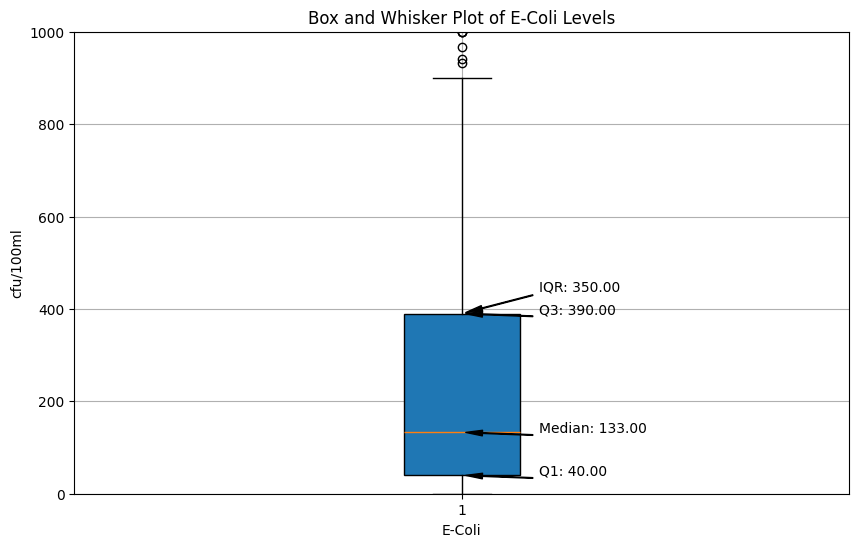

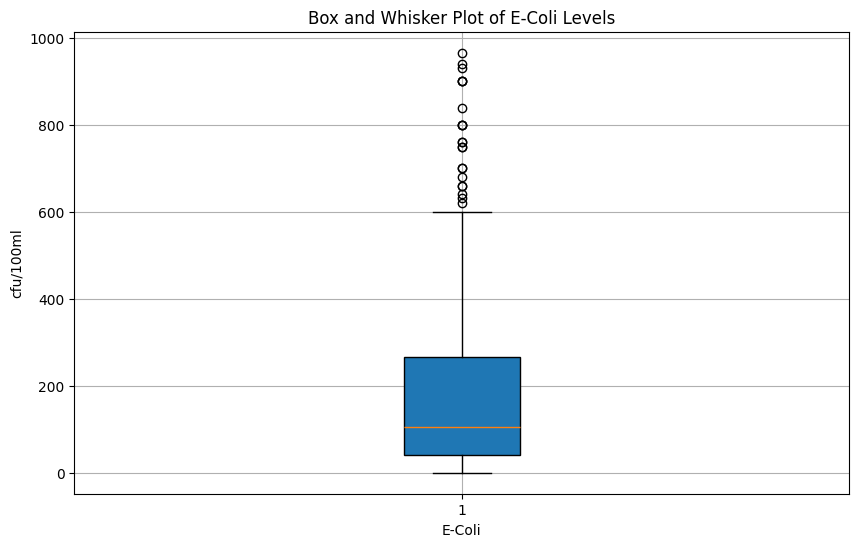

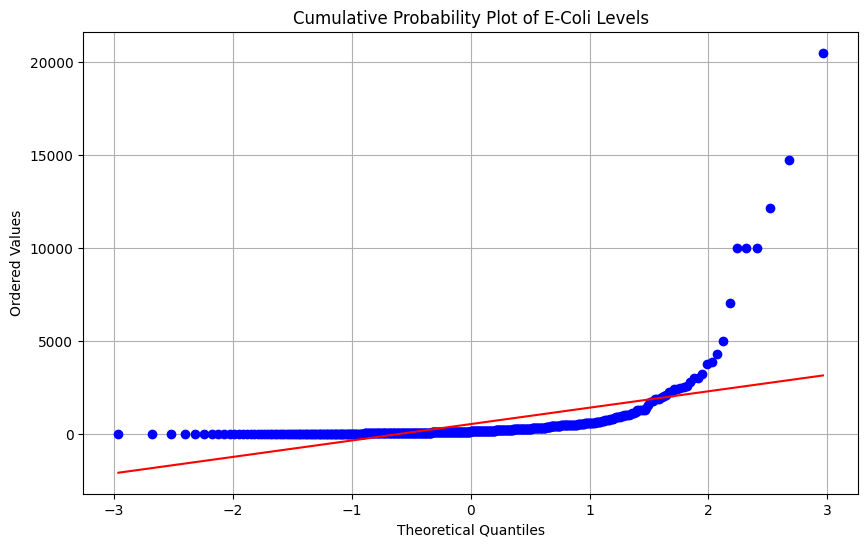

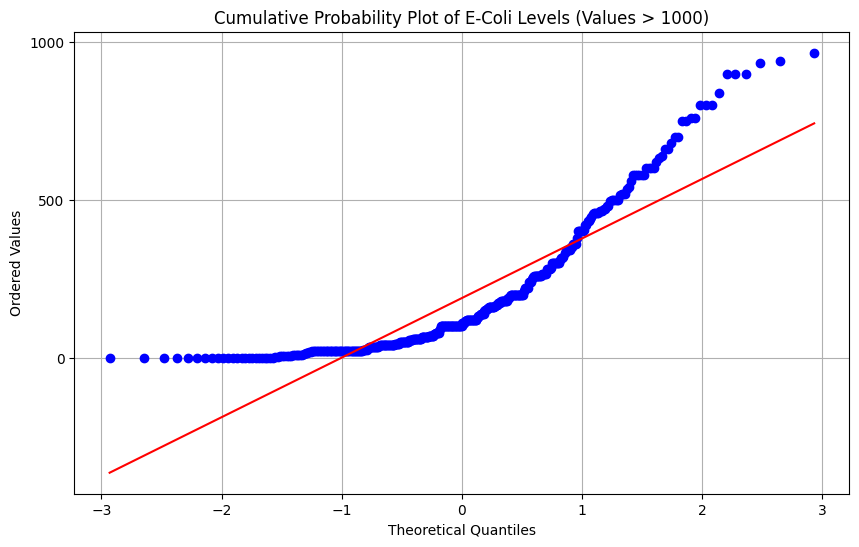

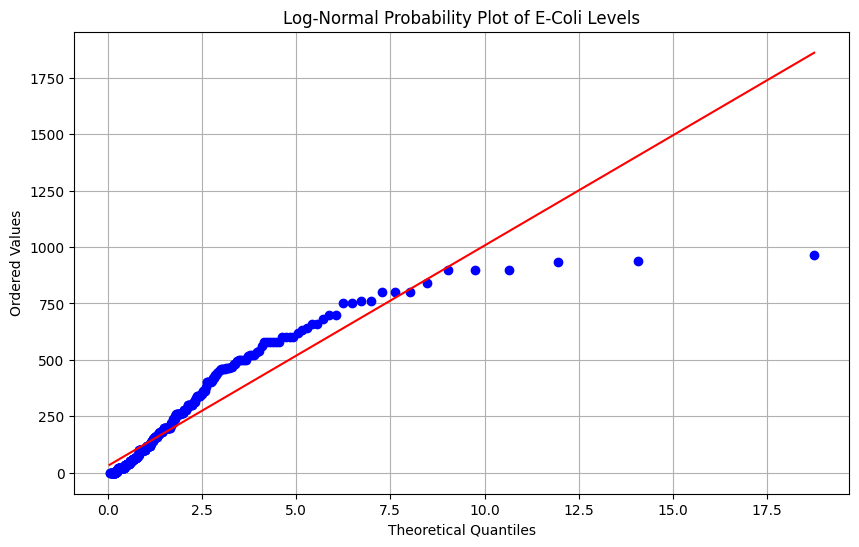

In [15]:
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator

# Calculate statistics
ecoli_stats = ecoli_data_clean['E-Coli'].dropna().describe(percentiles=[.25, .5, .75])
median = ecoli_stats['50%']
q1 = ecoli_stats['25%']
q3 = ecoli_stats['75%']
iqr = q3 - q1



plt.show()

#plot a box and whisker plot of the e-coli collumn of the ecoli_data_clean dataframe
plt.figure(figsize=(10, 6))
plt.boxplot(ecoli_data_clean['E-Coli'].dropna(), vert=True, patch_artist=True)
plt.title('Box and Whisker Plot of E-Coli Levels')
plt.xlabel('E-Coli')
plt.ylabel('cfu/100ml')
plt.ylim(0, 1000)  # Set y-axis limit
plt.grid(True)

# Annotate the plot with median, Q1, Q3, and IQR
arrowprops = dict(facecolor='black', shrink=0.05, width=0.5, headwidth=4)
plt.annotate(f'Median: {median:.2f}', xy=(1, median), xytext=(1.1, median),
             arrowprops=arrowprops)
plt.annotate(f'Q1: {q1:.2f}', xy=(1, q1), xytext=(1.1, q1),
             arrowprops=arrowprops)
plt.annotate(f'Q3: {q3:.2f}', xy=(1, q3), xytext=(1.1, q3),
             arrowprops=arrowprops)
plt.annotate(f'IQR: {iqr:.2f}', xy=(1, q3), xytext=(1.1, q3 + 50),
             arrowprops=arrowprops)

plt.show()

#plot a box and whisker plot of the e-coli collumn of the ecoli_data_clean dataframe
plt.figure(figsize=(10, 6))
plt.boxplot(ecoli_data_clean['E-Coli'][ecoli_data_clean['E-Coli'] < 1000].dropna(), vert=True, patch_artist=True)
plt.title('Box and Whisker Plot of E-Coli Levels')
plt.xlabel('E-Coli')
plt.ylabel('cfu/100ml')
plt.grid(True)
plt.show()

# Plot a cumulative probability plot of the 'E-Coli' column
plt.figure(figsize=(10, 6))
stats.probplot(ecoli_data_clean['E-Coli'].dropna(), dist="norm", plot=plt)
plt.title('Cumulative Probability Plot of E-Coli Levels')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# Plot a cumulative probability plot of the filtered 'E-Coli' column
plt.figure(figsize=(10, 6))
stats.probplot(ecoli_data_clean['E-Coli'][ecoli_data_clean['E-Coli'] < 1000].dropna(), dist="norm", plot=plt)
plt.title('Cumulative Probability Plot of E-Coli Levels (Values > 1000)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.gca().yaxis.set_major_locator(MultipleLocator(500))  # Set y-axis grid interval to 100
plt.show()

# Plot a cumulative probability plot for log-normal distribution of the 'E-Coli' column
plt.figure(figsize=(10, 6))
stats.probplot(ecoli_data_clean['E-Coli'][ecoli_data_clean['E-Coli'] < 1000].dropna(), dist="lognorm", sparams=(1,), plot=plt)
plt.title('Log-Normal Probability Plot of E-Coli Levels')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [16]:
print(ecoli_data_clean.describe())
print(ecoli_data_clean['E-Coli'][ecoli_data_clean['E-Coli'] < 1000].dropna().describe())

                         Sample Date        E-Coli  bacteria_threshold  \
count                            455    455.000000               455.0   
mean   2022-12-30 08:39:01.978021888    528.852747               310.0   
min              2021-02-03 00:00:00      0.000000               310.0   
25%              2022-02-24 00:00:00     40.000000               310.0   
50%              2023-01-03 00:00:00    133.000000               310.0   
75%              2023-12-13 00:00:00    390.000000               310.0   
max              2024-09-17 00:00:00  20480.000000               310.0   
std                              NaN   1650.388611                 0.0   

                               Month  
count                            455  
mean   2022-12-19 09:01:11.208791296  
min              2021-02-01 00:00:00  
25%              2022-02-01 00:00:00  
50%              2023-01-01 00:00:00  
75%              2023-12-01 00:00:00  
max              2024-09-01 00:00:00  
std                  

## Filter and Aggregate Data
Concerntrate on recent data > 2021

Remove outliers which skew the baseline

Aggregate data for the same month using geometric mean

In [17]:
#ecoli_data_clean

In [18]:
from scipy.stats import gmean

#Aggregate data for the same month using geometric mean
# Group by 'Site ID' and 'Month' and calculate geometric mean
grouped_data = ecoli_data_clean.groupby(['Site ID', 'Month']).agg({
    'E-Coli': lambda x: gmean(x[x > 0]) if (x > 0).any() else 0  # Geometric mean, ignoring non-positive values
}).reset_index()

#grouped_data[grouped_data['Month'] == '2021-09-01']
#grouped_data.duplicated(subset=['Site ID', 'Month'])
#grouped_data

Determine the appropriate range for CFU/ml.  Counts above 250 are considered Too Numerous To Count (TNTC) because it is impossible to tell whether colonies are separated (https://wic.oregonstate.edu/microbiology-writing-guide-presenting-data)

In [19]:
start_date = pd.Timestamp('2021-01-01')
#filtered_data = ecoli_data_clean[ecoli_data_clean['Month'] >= start_date]
filtered_data = grouped_data

#Filter for site id = Bennett Ave  
#filtered_data = filtered_data[filtered_data['Site ID'] == 'Bennett Ave']

#Filter e-coli values greater than 5000
#filtered_data = filtered_data[filtered_data['E-Coli'] <= 5000]


#show unique site ids
site_ids = filtered_data['Site ID'].unique()
site_ids

#filtered_data


array(['Bennett Ave', 'Broadway St', 'C St', 'Cedar St', 'Cornwall St',
       'Little Squalicum Creek', 'Olive St', 'Padden Creek',
       'Squalicum Creek', 'Whatcom Creek', 'Willow St'], dtype=object)

What's up with G06-1001, G05-1002, and G11-1011 site ids?

In [20]:
filtered_data.dtypes
numeric_columns = filtered_data.select_dtypes(include=[np.number]).columns #Only group numeric columns or error
median_per_month = filtered_data.groupby(pd.Grouper(key='Month', freq='MS'))[numeric_columns].median().reset_index() #'MS' = Month Start 
#average_per_month = average_per_month.sort_values(['Site ID', 'Site ID'])

median_per_month

,Month,E-Coli
0,2021-02-01,50.000000
1,2021-03-01,40.000000
2,2021-04-01,40.000000
3,2021-05-01,30.000000
4,2021-06-01,50.000000
5,2021-07-01,103.666003
6,2021-08-01,130.000000
7,2021-09-01,174.852814
8,2021-10-01,210.000000
9,2021-11-01,130.000000


## Visualize

In [21]:
import altair as alt

# Create a selection for the dropdown
#site_id_dropdown = alt.binding_select(options=filtered_data['Site ID'].unique(), name='Site ID')
#site_id_select = alt.selection_point(fields=['Site ID'], bind=site_id_dropdown, value={'Site ID': filtered_data['Site ID'].unique()[0]})

# Ensure the data is specified at the top level
plot_data = median_per_month

# Base chart
chart = alt.Chart(plot_data).mark_line(point=True).encode(
    x=alt.X('Month:T', timeUnit='yearmonth', axis=alt.Axis(format='%m-%Y', title='Sample Date', labelAngle=90)),
    y=alt.Y('E-Coli:Q', scale=alt.Scale(domain=[0, 2000])),  # Set y-axis limit
    #color='Site ID:N',
    tooltip=['Month:T', 'E-Coli:Q']
).properties(
    title='Median E. Coli Measurements by Month',
    width=800,
    height=400
#).add_selection(
#    site_id_select
#).transform_filter(
#    site_id_select
).interactive()

# Horizontal line at y=320
horizontal_line = alt.Chart(pd.DataFrame({'y': [320]})).mark_rule(
    color='red',
    strokeDash=[5, 5]
).encode(
    y='y:Q'
)

line_chart = chart + horizontal_line

# Histogram of E-Coli
histogram = alt.Chart(filtered_data).mark_bar().encode(
    x=alt.X('E-Coli:Q', bin=alt.Bin(step=50), scale=alt.Scale(domain=[0, 3000])),
    y='count()',
    #color='Site ID:N'
).properties(
    title='Histogram of E. Coli Measurements',
    width=800,
    height=200
)

# Combine the line chart and histogram
final_chart = alt.vconcat(line_chart, histogram)

final_chart.show()



alt.VConcatChart(...)

In [22]:
# Ensure the data is specified at the top level
plot_data = filtered_data
# Filter data to include only the specified site IDs
#plot_data = plot_data[plot_data['Site ID'].isin(['Bennett Ave', 'Broadway St', 'C St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Cedar St', 'Little Squalicum Creek', 'Olive St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Padden Creek', 'Squalicum Creek', 'Whatcom Creek', 'Willow St'])]

# Base chart
base_chart = alt.Chart().mark_line(point=True).encode(
    x=alt.X('Month:T', timeUnit='yearmonth', axis=alt.Axis(format='%m-%Y', title='Sample Date', labelAngle=90)),
    y=alt.Y('E-Coli:Q', scale=alt.Scale(domain=[0, 5000])),  # Set y-axis limit
    color='Site ID:N',
    tooltip=['Month:T', 'Site ID:N', 'E-Coli:Q']
).properties(
    width=400,
    height=200
)

# Horizontal line at y=320
horizontal_line = alt.Chart(pd.DataFrame({'y': [bacteria_threshold]})).mark_rule(
    color='red',
    strokeDash=[5, 5]
).encode(
    y='y:Q'
)

# Layer the base chart and the horizontal line
layered_chart = alt.layer(base_chart, horizontal_line, data=plot_data)

# Apply faceting after layering with max columns
faceted_chart = layered_chart.facet(
    column='Site ID:N'
).properties(
    title='E. Coli Measurements by Month for Each Site ID'
).interactive()

faceted_chart.show()

alt.FacetChart(...)

In [23]:
# Ensure the data is specified at the top level
plot_data = filtered_data
# Filter data to include only the specified site IDs
#plot_data = plot_data[plot_data['Site ID'].isin(['Bennett Ave', 'Broadway St', 'C St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Cedar St', 'Little Squalicum Creek', 'Olive St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Padden Creek', 'Squalicum Creek', 'Whatcom Creek', 'Willow St'])]

# Base chart
base_chart = alt.Chart(plot_data).mark_line(point=True).encode(
    x=alt.X('Month:T', timeUnit='yearmonth', axis=alt.Axis(format='%m-%Y', title='Sample Date', labelAngle=90)),
    y=alt.Y('E-Coli:Q', scale=alt.Scale(domain=[0, 1000], clamp=True), axis=alt.Axis(tickCount=10)),  # Set y-axis limit
    color='Site ID:N',
    tooltip=['Month:T', 'Site ID:N', 'E-Coli:Q'],
    facet = alt.Facet('Site ID:N', columns=4)
).properties(
    width=400,
    height=200
)

base_chart

alt.Chart(...)

In [24]:
# Ensure the data is specified at the top level
plot_data = filtered_data
# Filter data to include only the specified site IDs
#plot_data = plot_data[plot_data['Site ID'].isin(['Bennett Ave', 'Broadway St', 'C St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Cedar St', 'Little Squalicum Creek', 'Olive St'])]
#plot_data = plot_data[plot_data['Site ID'].isin(['Padden Creek', 'Squalicum Creek', 'Whatcom Creek', 'Willow St'])]

# Base chart
base_chart = alt.Chart(plot_data).mark_line(point=True).encode(
    x=alt.X('Month:T', timeUnit='yearmonth', axis=alt.Axis(format='%m-%Y', title='Sample Date', labelAngle=90)),
    y=alt.Y('E-Coli:Q', scale=alt.Scale(type='log', domain=[1, 30000], clamp=True), axis=alt.Axis(tickCount=10)),  # Set y-axis to log scale
    color='Site ID:N',
    tooltip=['Month:T', 'Site ID:N', 'E-Coli:Q'],
    facet = alt.Facet('Site ID:N', columns=4)
).properties(
    width=400,
    height=200
)

base_chart

alt.Chart(...)

In [25]:
#https://www.geeksforgeeks.org/understanding-facet-wrap-in-altair/ 

#Second Filter e-coli values greater than 1000
filtered_data2 = filtered_data[filtered_data['E-Coli'] <= 1000]

# Histogram of E-Coli with bin size 50, faceted by Site ID
histogram = alt.Chart(filtered_data2).mark_bar().encode(
    x=alt.X('E-Coli:Q', bin=alt.Bin(step=50)),
    y='count()',
    color='Site ID:N',
    facet=alt.Facet('Site ID:N', columns=4)
).properties(
    title='E. Coli Histogram',
    width=200,
    height=200
)

#.facet(
#    column='Site ID:N',
#)

histogram.show()

alt.Chart(...)

## Modelling Typical Stormwater bacteria levels

In [26]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset
num_samples = 500  # Total data points across all outfalls
outfall_ids = ["Outfall_1", "Outfall_2", "Outfall_3"]  # Outfall locations

# Calculate samples per outfall to ensure uniform distribution
samples_per_outfall = num_samples // len(outfall_ids)  
total_samples = samples_per_outfall * len(outfall_ids)  # Adjust to align

# Generate timestamps for each sample, spaced by the hour
times = pd.date_range("2024-01-01", periods=samples_per_outfall, freq="H")

# Generate bacteria levels using a log-normal distribution
bacteria_levels = np.random.lognormal(mean=3.5, sigma=1.0, size=total_samples)

# Repeat outfall IDs and tile timestamps to align with the samples
outfalls = np.repeat(outfall_ids, samples_per_outfall)
timestamps = np.tile(times, len(outfall_ids))

# Create the DataFrame
data = pd.DataFrame({
    "Timestamp": timestamps,
    "Outfall": outfalls,
    "Bacteria_CFU_100mL": bacteria_levels
})

# Display the dataset (only needed for your reference)
print(data.head())



            Timestamp    Outfall  Bacteria_CFU_100mL
0 2024-01-01 00:00:00  Outfall_1           54.419043
1 2024-01-01 01:00:00  Outfall_1           28.839204
2 2024-01-01 02:00:00  Outfall_1           63.287544
3 2024-01-01 03:00:00  Outfall_1          151.870754
4 2024-01-01 04:00:00  Outfall_1           26.202285


/var/folders/_s/jtjh9qbn6m7c74p0ybbm9jbh0000gn/T/ipykernel_67268/1215018622.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range("2024-01-01", periods=samples_per_outfall, freq="H")


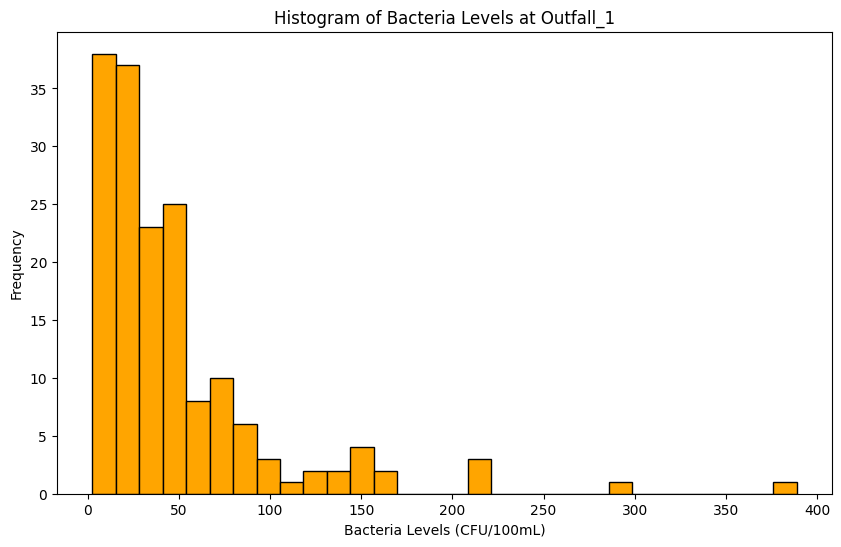

In [27]:
import matplotlib.pyplot as plt

# Filter the data for Outfall_1
outfall_to_plot = "Outfall_1"
subset = data[data["Outfall"] == outfall_to_plot]

# Plot the histogram of bacteria levels
plt.figure(figsize=(10, 6))
plt.hist(subset["Bacteria_CFU_100mL"], bins=30, edgecolor='black', color='orange')
plt.title(f"Histogram of Bacteria Levels at {outfall_to_plot}")
plt.xlabel("Bacteria Levels (CFU/100mL)")
plt.ylabel("Frequency")
plt.show()

### Matplotlib Visulazation

/var/folders/_s/jtjh9qbn6m7c74p0ybbm9jbh0000gn/T/ipykernel_67268/1783387904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_data['E-Coli Moving Average'] = site_data['E-Coli'].rolling(window=4).mean()


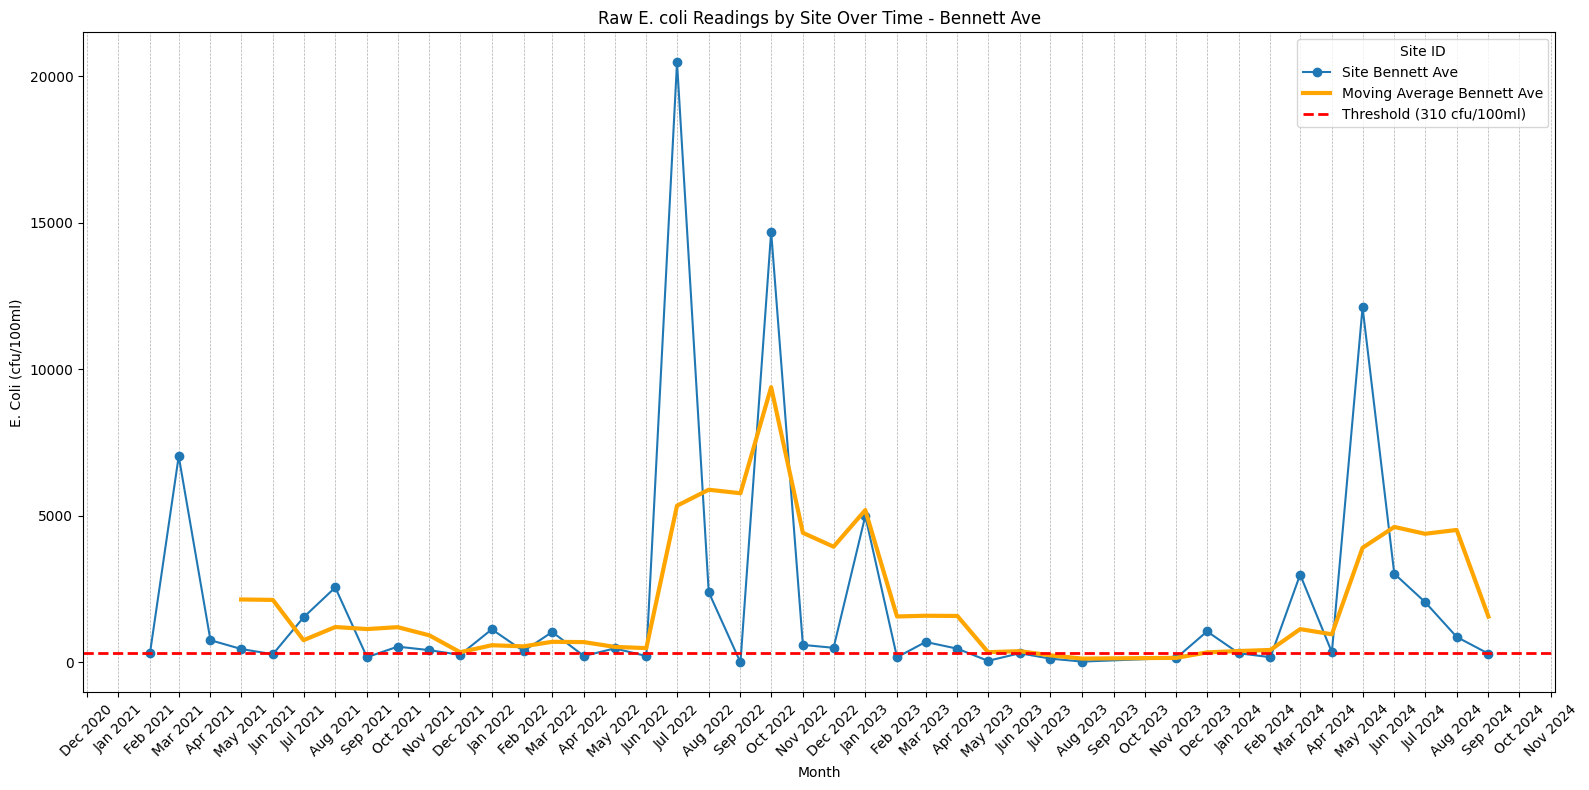

In [28]:
import matplotlib.dates as mdates

site_data = filtered_data[filtered_data['Site ID'] == 'Bennett Ave']

# Calculate the moving average (window size of 5 for example)
site_data['E-Coli Moving Average'] = site_data['E-Coli'].rolling(window=4).mean()

fig, ax = plt.subplots(figsize=(16, 8))
for site_id, group in site_data.groupby('Site ID'):
    ax.plot(group['Month'], group['E-Coli'], marker='o', linestyle='-', label=f'Site {site_id}')
    ax.plot(group['Month'], group['E-Coli Moving Average'], marker='', linestyle='-', linewidth=3, color='orange', label=f'Moving Average {site_id}')

# Set the major locator and formatter for the x-axis to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add vertical grid lines for each month
ax.grid(which='major', axis='x', linestyle='--', linewidth=0.5)

ax.set_title('Raw E. coli Readings by Site Over Time - Bennett Ave')
ax.set_xlabel('Month')
ax.set_ylabel('E. Coli (cfu/100ml)')
ax.axhline(y=bacteria_threshold, color='red', linewidth=2, linestyle='--', label='Threshold (310 cfu/100ml)')
ax.legend(title='Site ID')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#site_data

Bennett Ave Data has mnay outliers 

/var/folders/_s/jtjh9qbn6m7c74p0ybbm9jbh0000gn/T/ipykernel_67268/136297745.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title='Site ID')


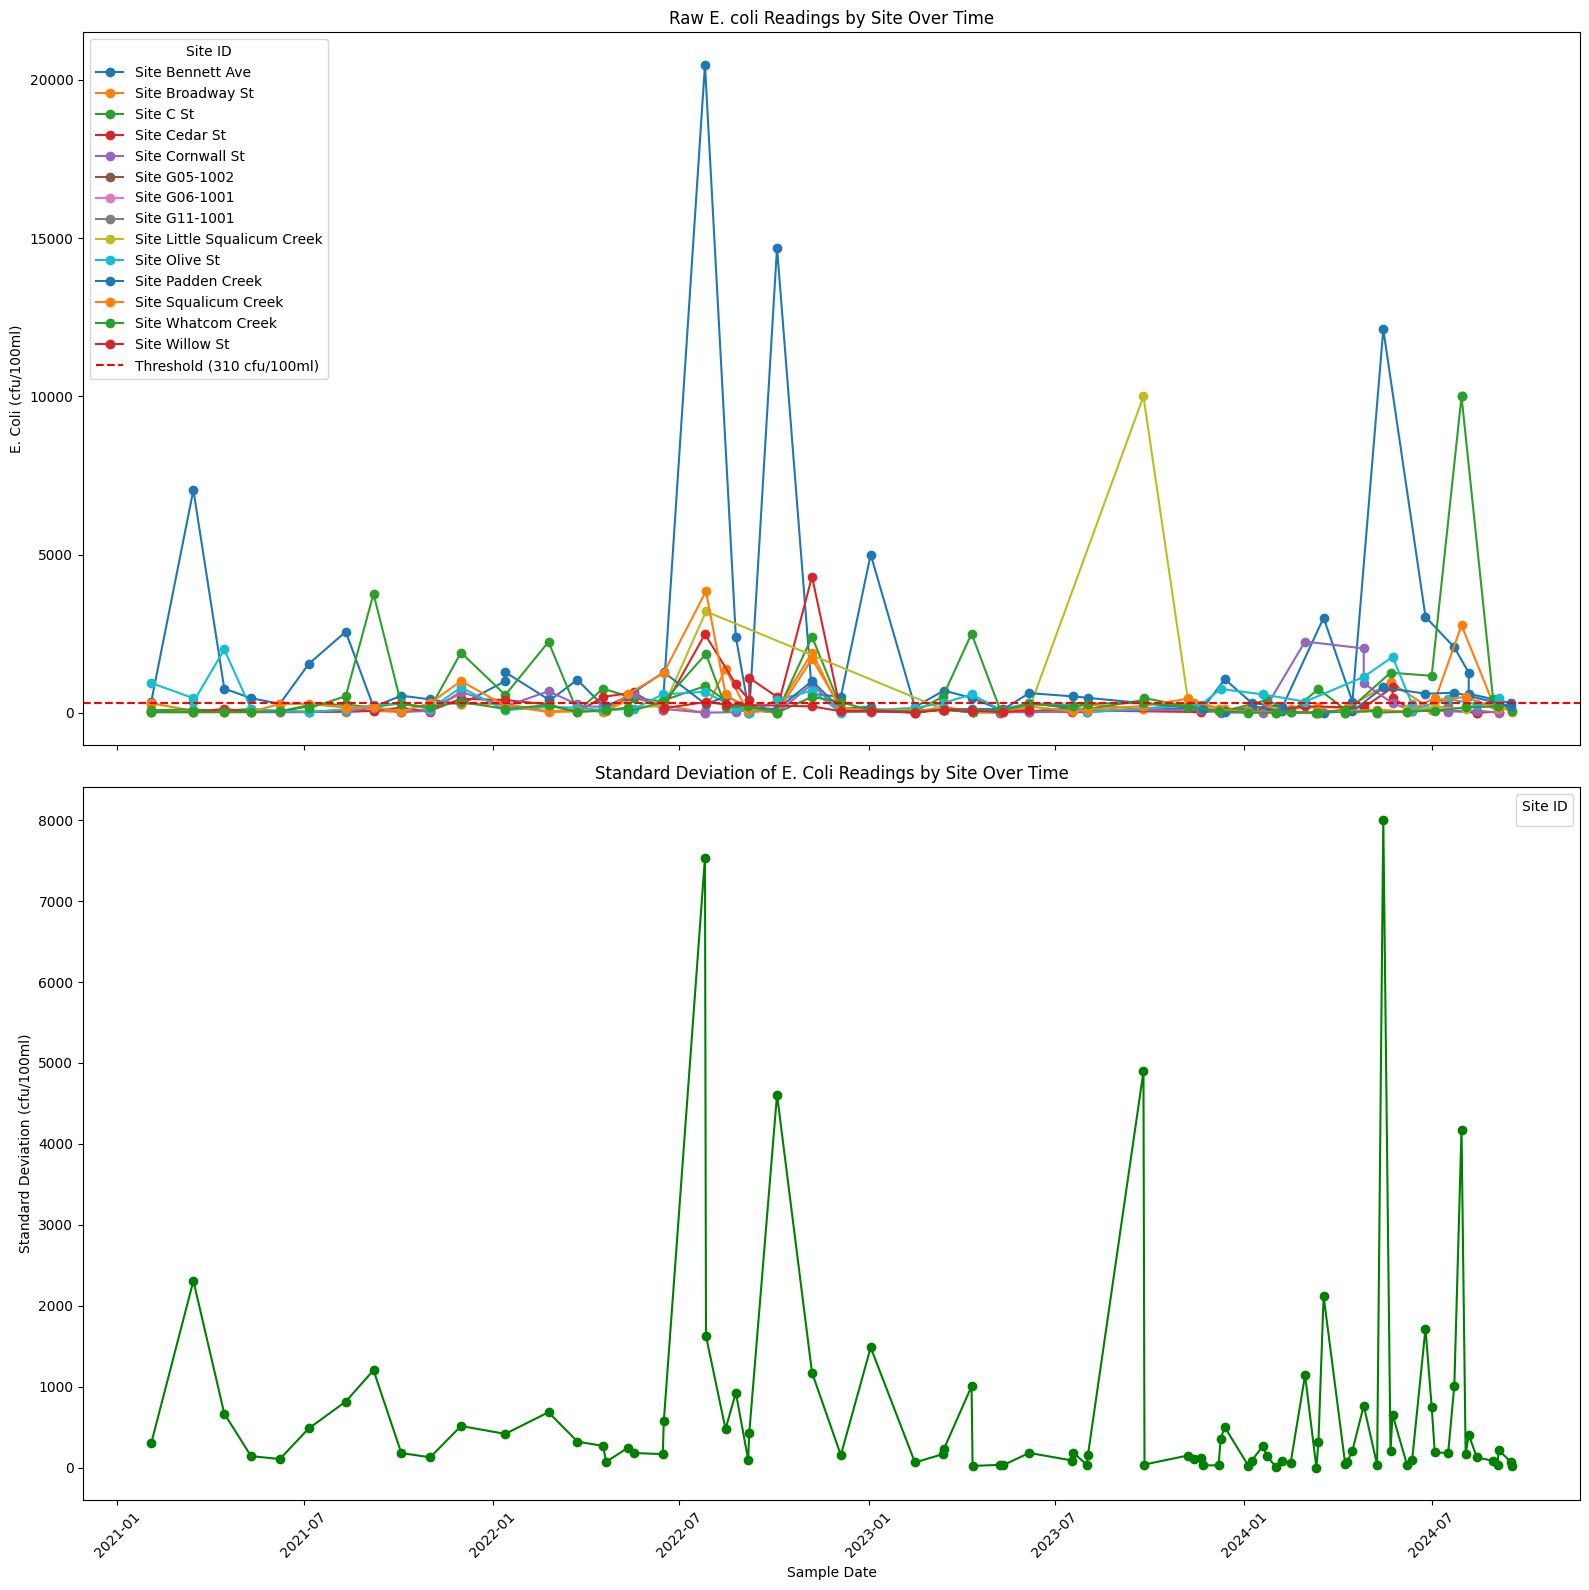

In [29]:
# Create a figure with two subplots (ax for raw readings and ax2 for variability F-chart)
fig, (ax, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 16), sharex=True)

# Plotting E. Coli readings by Site
for site_id, group in ecoli.groupby('Site ID'):
    ax.plot(group['Sample Date'], group['E-Coli'], marker='o', linestyle='-', label=f'Site {site_id}')

ax.set_title('Raw E. coli Readings by Site Over Time')
ax.set_ylabel('E. Coli (cfu/100ml)')
ax.axhline(y=310, color='red', linestyle='--', label='Threshold (310 cfu/100ml)')
ax.legend(title='Site ID')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Plotting F-chart of variability (Standard Deviation over time)
# Calculating standard deviation for each date
std_dev_by_date = ecoli.groupby('Sample Date')['E-Coli'].std()
ax2.plot(std_dev_by_date.index, std_dev_by_date, marker='o', linestyle='-', color='green')

# Plotting F-chart of variability (Standard Deviation over time) by Site ID

#for site_id, group in ecoli.groupby('Site ID'):
#    std_dev = group.groupby('Sample Date')['E. Coli'].std()
#    ax2.plot(std_dev.index, std_dev, marker='o', linestyle='-', label=f'Site {site_id}')

ax2.set_title('Standard Deviation of E. Coli Readings by Site Over Time')
ax2.set_xlabel('Sample Date')
ax2.set_ylabel('Standard Deviation (cfu/100ml)')
ax2.legend(title='Site ID')

plt.tight_layout()
plt.show()

In [30]:
ecoli[ecoli['Site ID'] == 'Bennett Ave']

,Sample Date,Site ID,E-Coli,is_duplicate,is_exceedence,bacteria_threshold,Month
0,2021-02-03,Bennett Ave,340.0,False,True,310,2021-02
1,2021-03-16,Bennett Ave,7040.0,False,True,310,2021-03
2,2021-04-15,Bennett Ave,760.0,False,True,310,2021-04
3,2021-05-11,Bennett Ave,460.0,False,True,310,2021-05
4,2021-06-08,Bennett Ave,280.0,False,False,310,2021-06
5,2021-07-06,Bennett Ave,1540.0,False,True,310,2021-07
6,2021-08-11,Bennett Ave,2560.0,False,True,310,2021-08
7,2021-09-07,Bennett Ave,180.0,False,False,310,2021-09
8,2021-10-04,Bennett Ave,540.0,False,True,310,2021-10
9,2021-11-01,Bennett Ave,420.0,False,True,310,2021-11


In [31]:
# Aggregate data for plotting
ecoli_aggregated_mean = ecoli.groupby(['Month', 'Site ID'])['E-Coli'].mean().unstack()
ecoli_aggregated_std = ecoli.groupby(['Month', 'Site ID'])['E-Coli'].std().unstack()
enterococcus_aggregated = enterococcus.groupby(['Month', 'Site ID'])['Enterococcus'].mean().unstack()

In [32]:
ecoli_aggregated_mean
#ecoli_aggregated[ecoli_aggregated['Site ID'] == 'Bennett Ave']

Site ID,Bennett Ave,Broadway St,C St,Cedar St,Cornwall St,G05-1002,G06-1001,G11-1001,Little Squalicum Creek,Olive St,Padden Creek,Squalicum Creek,Whatcom Creek,Willow St
Month,,,,,,,,,,,,,,
2021-02,340.0,280.0,80.000000,20.0,20.0,NaN,NaN,NaN,NaN,940.0,NaN,20.0,20.0,NaN
2021-03,7040.0,60.0,100.000000,20.0,20.0,NaN,NaN,NaN,NaN,400.0,NaN,20.0,20.0,NaN
2021-04,760.0,20.0,60.000000,120.0,20.0,NaN,NaN,NaN,NaN,2000.0,NaN,20.0,20.0,NaN
2021-05,460.0,40.0,80.000000,20.0,20.0,NaN,NaN,NaN,NaN,120.0,NaN,20.0,20.0,NaN
2021-06,280.0,60.0,40.000000,20.0,20.0,NaN,NaN,NaN,NaN,60.0,NaN,280.0,40.0,NaN
2021-07,1540.0,40.0,240.000000,20.0,20.0,NaN,NaN,NaN,NaN,20.0,NaN,280.0,170.0,NaN
2021-08,2560.0,20.0,260.000000,40.0,70.0,NaN,NaN,NaN,NaN,100.0,NaN,160.0,520.0,NaN
2021-09,180.0,60.0,170.000000,60.0,160.0,NaN,NaN,NaN,NaN,240.0,NaN,180.0,3760.0,NaN
2021-10,540.0,20.0,300.000000,160.0,20.0,NaN,NaN,NaN,NaN,300.0,NaN,40.0,260.0,NaN


In [33]:
ecoli_threshold = 310
enterococcus_threshold = 500

<Axes: title={'center': 'Std Dev of E. Coli Readings'}, xlabel='Month'>

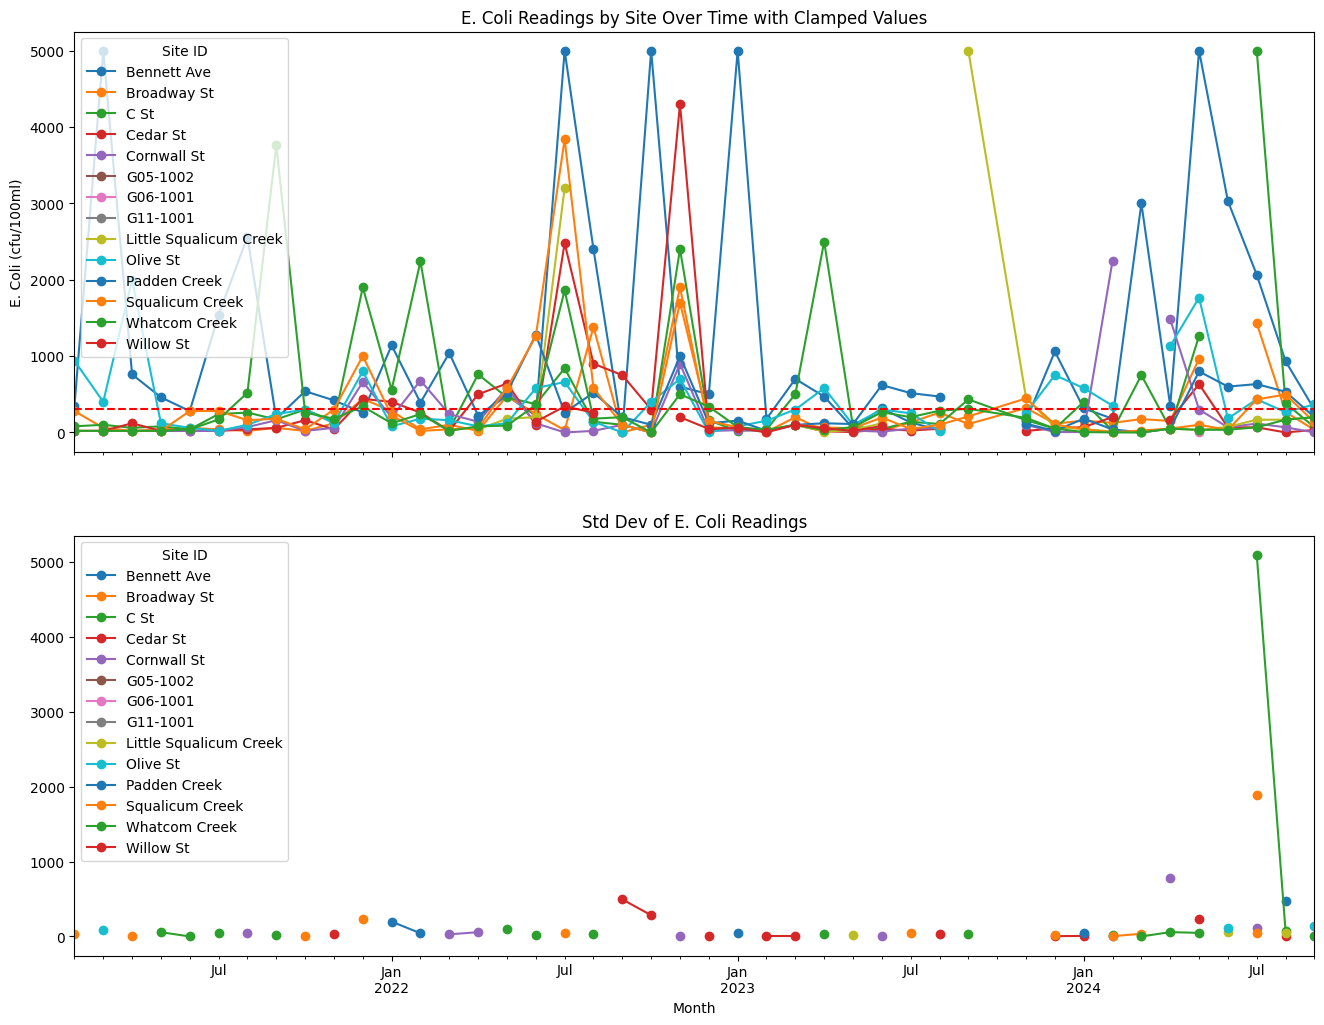

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
ecoli_aggregated_mean.clip(upper=5000).plot(ax=ax[0], marker='o', linestyle='-', title='E. Coli Readings by Site Over Time with Clamped Values')
ax[0].set_ylabel('E. Coli (cfu/100ml)')
ax[0].axhline(y=ecoli_threshold, color='red', linestyle='--', label='E. Coli Threshold (cfu/100ml)')
ecoli_aggregated_std.plot(ax=ax[1], marker='o', linestyle='-', title='Std Dev of E. Coli Readings')

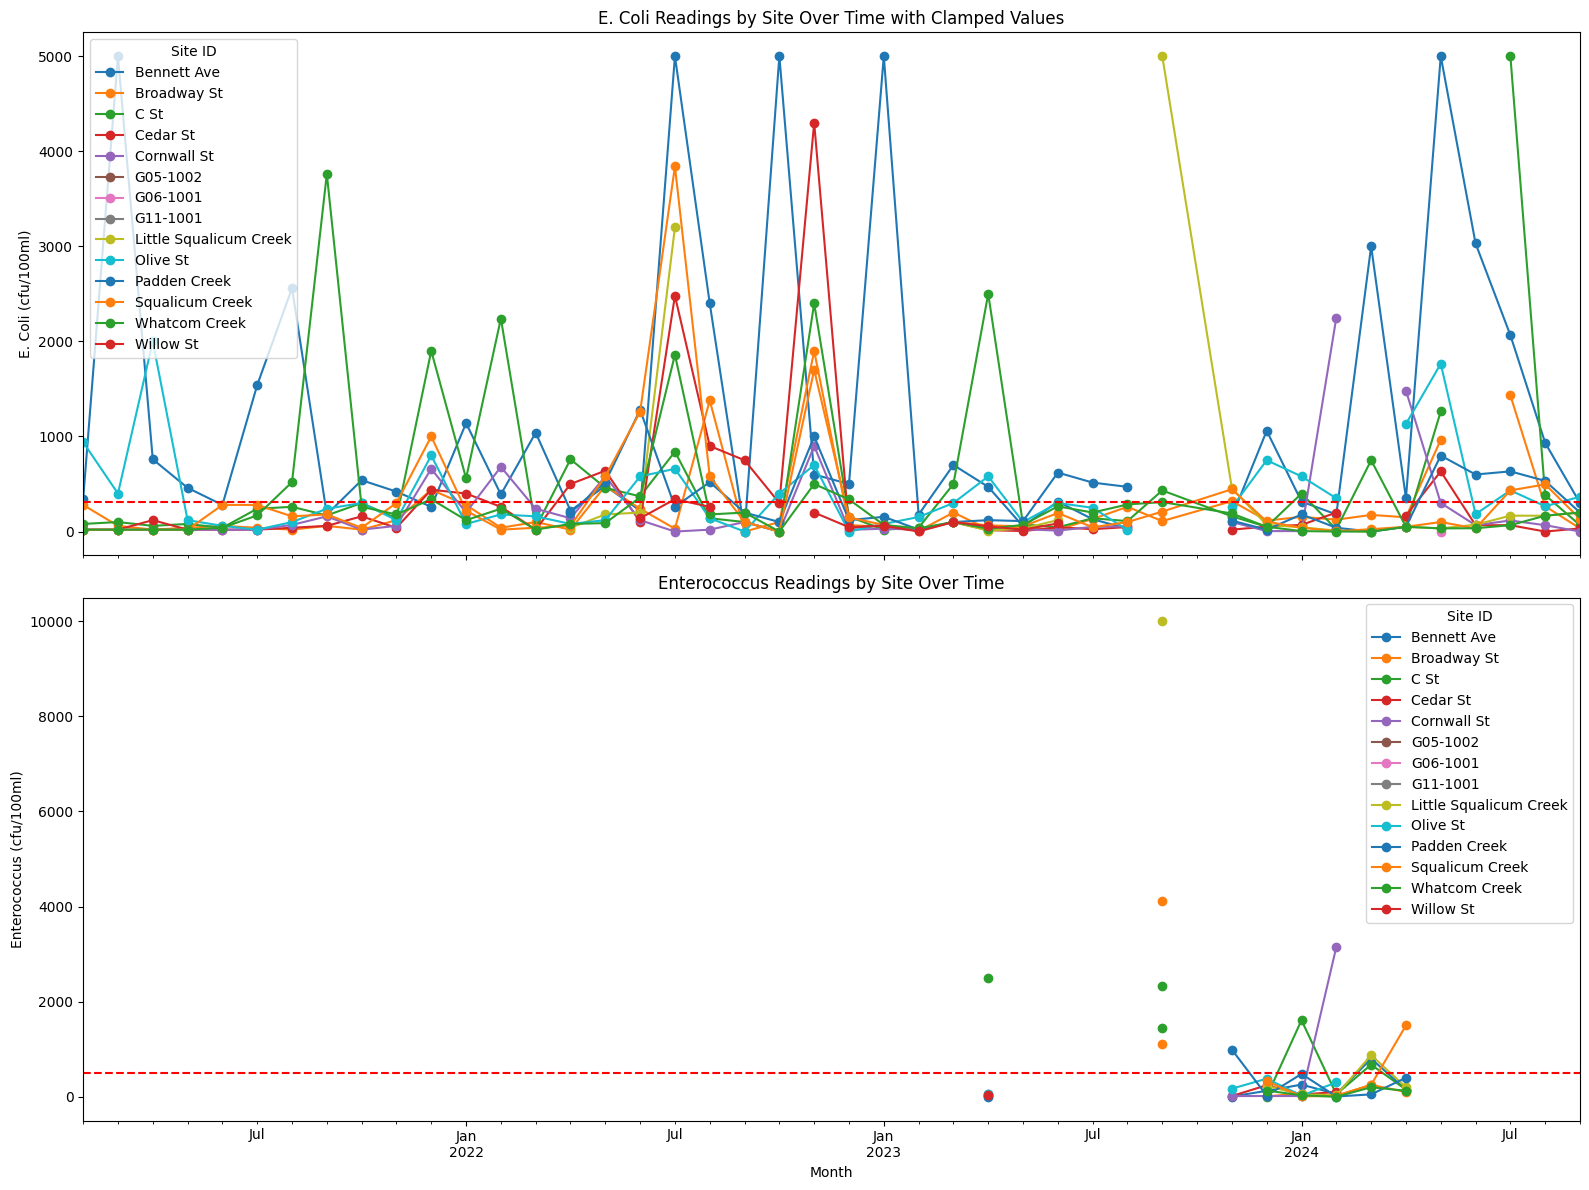

In [35]:
# Plotting the control charts
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
ecoli_aggregated_mean.clip(upper=5000).plot(ax=ax[0], marker='o', linestyle='-', title='E. Coli Readings by Site Over Time with Clamped Values')
ax[0].set_ylabel('E. Coli (cfu/100ml)')
ax[0].axhline(y=ecoli_threshold, color='red', linestyle='--', label='E. Coli Threshold (cfu/100ml)')
enterococcus_aggregated.plot(ax=ax[1], marker='o', linestyle='-', title='Enterococcus Readings by Site Over Time')
ax[1].set_ylabel('Enterococcus (cfu/100ml)')
ax[1].axhline(y=enterococcus_threshold, color='red', linestyle='--', label='Enterococcus Threshold (cfu/100ml)')
plt.tight_layout()
plt.show()

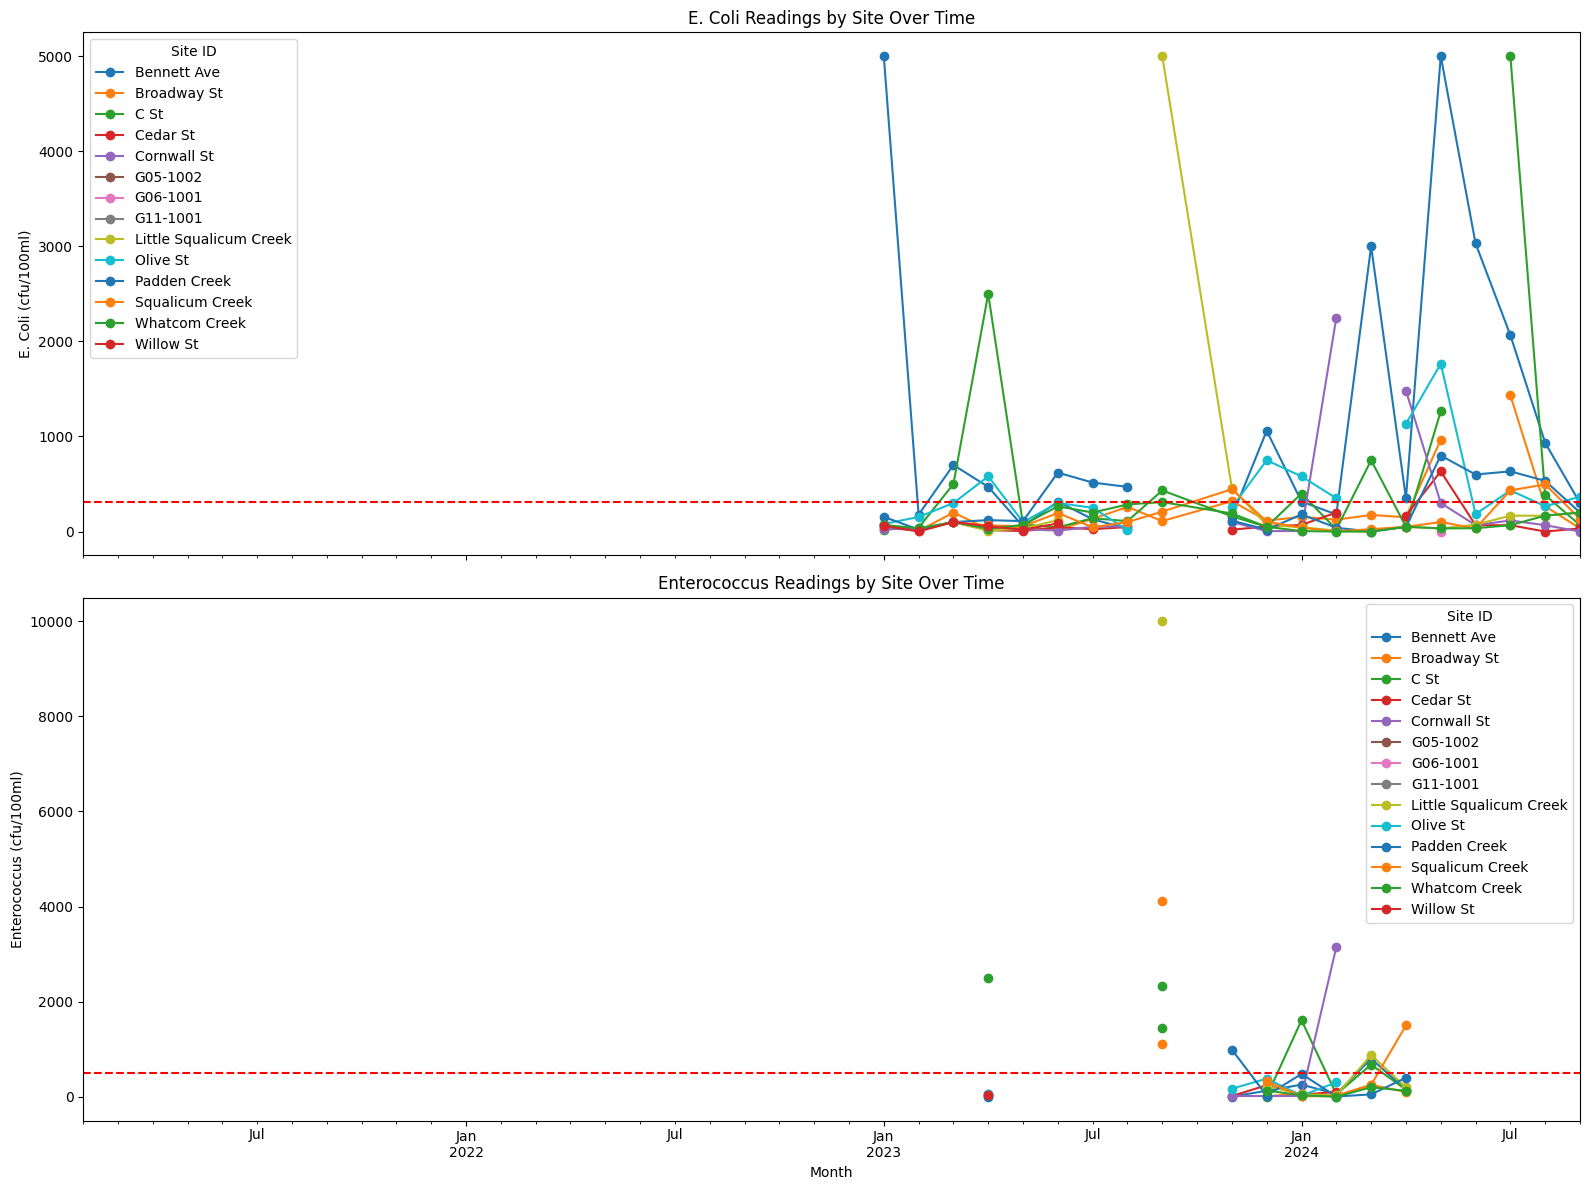

In [36]:
ecoli_aggregated_mean = ecoli_aggregated_mean[ecoli_aggregated_mean.index >= '2023-01']
enterococcus_aggregated_mean = enterococcus_aggregated[enterococcus_aggregated.index >= '2023-01']

fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
ecoli_aggregated_mean.clip(upper=5000).plot(ax=ax[0], marker='o', linestyle='-', title='E. Coli Readings by Site Over Time')
ax[0].set_ylabel('E. Coli (cfu/100ml)')
ax[0].axhline(y=ecoli_threshold, color='red', linestyle='--', label='E. Coli Threshold (cfu/100ml)')
enterococcus_aggregated.plot(ax=ax[1], marker='o', linestyle='-', title='Enterococcus Readings by Site Over Time')
ax[1].set_ylabel('Enterococcus (cfu/100ml)')
ax[1].axhline(y=enterococcus_threshold, color='red', linestyle='--', label='Enterococcus Threshold (cfu/100ml)')

plt.tight_layout()
plt.show()

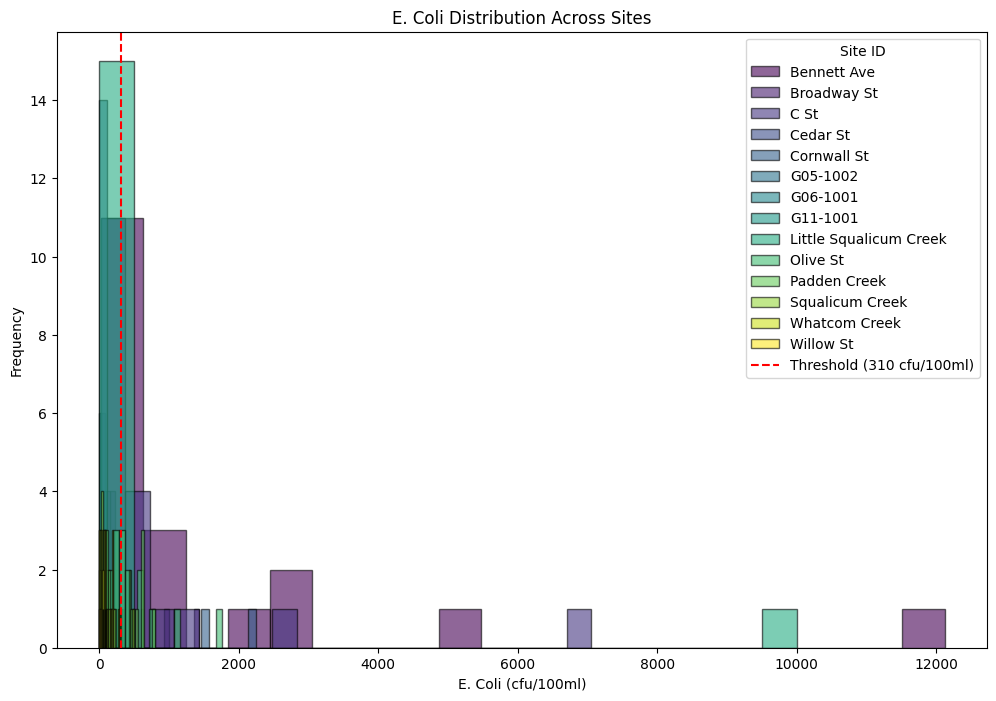

In [37]:
# Generate histograms
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(ecoli_aggregated_mean.columns)))

for (site, values), color in zip(ecoli_aggregated_mean.items(), colors):
    ax.hist(values.dropna(), bins=20, color=color, alpha=0.6, edgecolor='black', label=site)

ax.axvline(x=ecoli_threshold, color='red', linestyle='--', label='Threshold (310 cfu/100ml)')
ax.set_title('E. Coli Distribution Across Sites')
ax.set_xlabel('E. Coli (cfu/100ml)')
ax.set_ylabel('Frequency')
ax.legend(title='Site ID')
plt.show()

In [38]:
# Calculate exceedances for E. coli
ecoli_exceedances = filtered_data[filtered_data['E-Coli'] > ecoli_threshold]
ecoli_exceedances['Year'] = ecoli_exceedances['Month'].dt.year
exceedance_counts = ecoli_exceedances.groupby(['Year', 'Site ID']).size().reset_index(name='Exceedance Count')
total_counts = filtered_data.groupby([ecoli['Month'].dt.year, 'Site ID']).size().reset_index(name='Total Readings')
total_counts.rename(columns={'Month': 'Year'}, inplace=True)
exceedance_data = pd.merge(total_counts, exceedance_counts, on=['Year', 'Site ID'], how='left').fillna(0)
exceedance_data['Exceedance Percentage'] = (exceedance_data['Exceedance Count'] / exceedance_data['Total Readings']) * 100

exceedance_data

/var/folders/_s/jtjh9qbn6m7c74p0ybbm9jbh0000gn/T/ipykernel_67268/3547678244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecoli_exceedances['Year'] = ecoli_exceedances['Month'].dt.year


,Year,Site ID,Total Readings,Exceedance Count,Exceedance Percentage
0,2021.0,Bennett Ave,11,8.0,72.727273
1,2021.0,Broadway St,15,1.0,6.666667
2,2021.0,C St,13,1.0,7.692308
3,2021.0,Cedar St,1,1.0,100.000000
4,2021.0,Cornwall St,12,1.0,8.333333
5,2021.0,Olive St,12,4.0,33.333333
6,2021.0,Squalicum Creek,10,1.0,10.000000
7,2021.0,Whatcom Creek,2,3.0,150.000000
8,2022.0,Bennett Ave,14,9.0,64.285714
9,2022.0,Broadway St,13,3.0,23.076923


In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets

from shapely.geometry import Point
import random

# Approximate latitude and longitude for stormwater outfalls and creeks in Bellingham
locations = {
    "Little Squalicum Creek": (48.7655, -122.5163),
    "Squalicum Creek": (48.7593, -122.5022),
    "Whatcom Creek": (48.7550, -122.4872),
    "Padden Creek": (48.7252, -122.5031),
    "Broadway Outfall": (48.7575, -122.5001),
    "C St. Outfall": (48.7540, -122.4983),
    "Cornwall Outfall": (48.7505, -122.4948),
    "Cedar Outfall": (48.7480, -122.4903),
    "Bennett Outfall": (48.7305, -122.5147),
    "Olive Outfall": (48.7340, -122.5002)
}

# Example bacteria levels (colony-forming units per 100 mL)
bacteria_levels = {location: random.randint(50, 500) for location in locations.keys()}

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {"Location": list(locations.keys()), "Bacteria Level": list(bacteria_levels.values())},
    geometry=[Point(lon, lat) for lat, lon in locations.values()]
)

# Load a basemap

#Option #1
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))
#usa = world[world['iso_a3'] == "USA"]

#Option #2 
# download dataset from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/ https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/110m_cultural.zip
# TODO: Not sure which shp file to use.  This populated places is not correct
#world = gpd.read_file('110m_cultural/ne_110m_populated_places_simple.shp')
#usa = world[world.name == "United States"]

AttributeError: 'GeoDataFrame' object has no attribute 'name'

ValueError: aspect must be finite and positive 

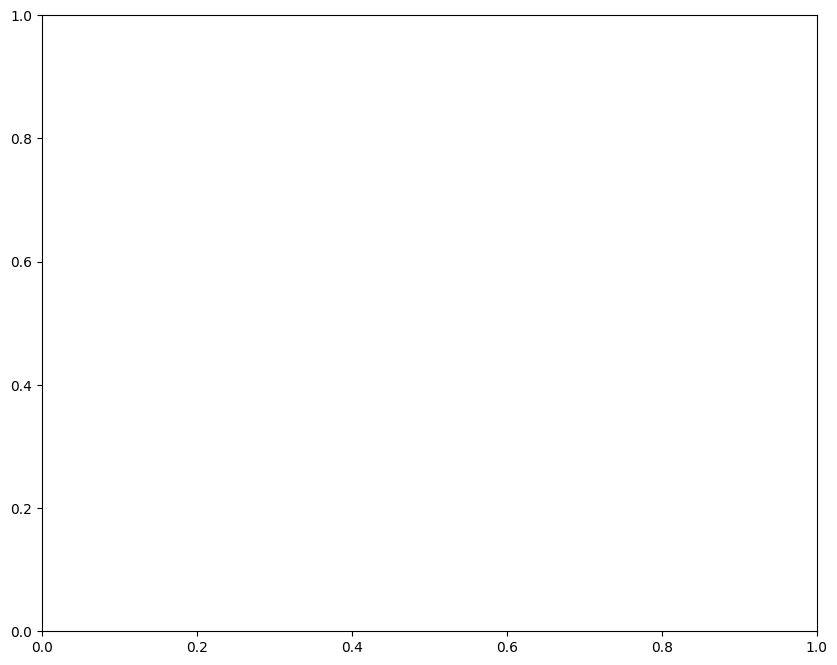

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(10, 8))
usa.plot(ax=ax, color="lightgrey")
gdf.plot(ax=ax, markersize=gdf["Bacteria Level"] * 0.5, 
         color=["red" if lvl > 100 else "green" for lvl in gdf["Bacteria Level"]], alpha=0.6, edgecolor="black")

# Annotate points
for x, y, label, value in zip(gdf.geometry.x, gdf.geometry.y, gdf["Location"], gdf["Bacteria Level"]):
    ax.text(x, y, f"{label}\n{value}", fontsize=9, ha='right', color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.title("Bacteria Levels at Stormwater Outfalls and Creeks in Bellingham")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()